In [1]:
# entropy and information content
import math

def entropy(p):
    'point-entropy of occurance with probability p.'
    if p != 0:
        return - p * math.log(p, 2)
    return 0.

def info_content(p):
    'information content of event with probability p.'
    if p != 0:
        return - math.log(p, 2)
    return 0.

print(entropy(0.5), entropy(0.1), entropy(0))
print(info_content(0.5), info_content(0.1), info_content(0))

print('info of a die, rolling a 4:', info_content(1/6), ' bits')

0.5 0.33219280948873625 0.0
1.0 3.321928094887362 0.0
info of a die, rolling a 4: 2.584962500721156  bits


In [2]:
equl_distr = [x/6 for x in range(6)]
lopside_distr = [1., 0, 0, 0, 0, 0]

def tot_entropy(dist):
    return sum([entropy(x) for x in dist])

print('equal distr entropy:', tot_entropy(equl_distr))
print('lopsides distr entropy:', tot_entropy(lopside_distr))

equal distr entropy: 2.068318255702844
lopsides distr entropy: 0.0


In [3]:
# max entropy weight matrix split
import numpy as np

def weight_matsplit(mat):
    '''split weight matrix into sections of max purity.'''
    if np.size(mat, 0) < 3 or np.size(mat, 1) < 3:
        return mat  # no split
    max_std = 0
    for si in range(1, np.size(mat, 0)):
        for sj in range(1, np.size(mat, 1)):
            s00 = tot_entropy(mat[:si, :sj].flatten())
            s10 = tot_entropy(mat[si:, :sj].flatten())
            s01 = tot_entropy(mat[:si, sj:].flatten())
            s11 = tot_entropy(mat[si:, sj:].flatten())
            current_std = np.std([s00, s10, s01, s11])
            if current_std > max_std:
                max_stdij = (si, sj)
                max_std = current_std
    return max_stdij  # return max stdeviation split

weight_mat = np.random.rand(4, 4)

print(weight_mat)
ws = weight_matsplit(weight_mat)
print(weight_mat[:ws[0], :ws[1]])
print(weight_mat[ws[0]:, :ws[1]])
print(weight_mat[:ws[0], ws[1]:])
print(weight_mat[ws[0]:, ws[1]:])

[[0.49532115 0.56157935 0.11390459 0.85018198]
 [0.77265022 0.7441597  0.41071229 0.63305764]
 [0.28784601 0.42296708 0.67218027 0.50057793]
 [0.90447039 0.41331618 0.20941567 0.02642781]]
[[0.49532115 0.56157935 0.11390459]
 [0.77265022 0.7441597  0.41071229]
 [0.28784601 0.42296708 0.67218027]]
[[0.90447039 0.41331618 0.20941567]]
[[0.85018198]
 [0.63305764]
 [0.50057793]]
[[0.02642781]]


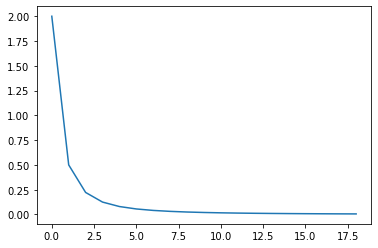

In [1]:
import math
import matplotlib.pyplot as plt

def lofka(x, n, c):
    return c / x ** n

lofka_smpl = [lofka(x, 2, 2) for x in range(1, 20)]
plt.plot(lofka_smpl)
plt.show()

In [14]:
from gensim.corpora import Dictionary

texts = [['human', 'interface', 'computer', 'computer', 'computer']]
dct = Dictionary(texts)  # initialize a Dictionary
dct.add_documents([["cat", "say", "meow"], ["dog", "dog"], ['computer']])  # add more document (extend the vocabulary)
#dct.doc2bow(["dog", "computer", "non_existent_word"])

print(dct.token2id['computer'])
print(dct.cfs[dct.token2id['computer']], dct.dfs[dct.token2id['computer']])  # cfs: overall token frequencies, dfc: # of docs containing token
print(dct.cfs)
print(dct.dfs)

0
4 2
{1: 1, 2: 1, 0: 4, 3: 1, 5: 1, 4: 1, 6: 2}
{1: 1, 2: 1, 0: 2, 3: 1, 5: 1, 4: 1, 6: 1}


In [22]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os

MY_PATH = r'C:\Users\bscho\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)

doc_tokenized = [
   simple_preprocess(line, deacc =True) for line in open('lesmiserables.txt', encoding='utf-8')
]
dictionary = corpora.Dictionary(doc_tokenized)

#BoW_corpus = [
#   dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized
#]
#print(BoW_corpus)

In [25]:
print(sorted(dictionary.dfs.items(), key=lambda item: item[1], reverse=True))

[(27, 27504), (15, 16382), (8, 13630), (35, 11694), (56, 10088), (88, 8078), (89, 7716), (139, 7161), (111, 5873), (94, 5559), (164, 5537), (57, 5381), (133, 4844), (67, 4225), (71, 4213), (166, 3820), (108, 3801), (113, 3585), (255, 3026), (329, 2915), (9, 2798), (121, 2788), (130, 2723), (272, 2612), (18, 2514), (237, 2369), (119, 2341), (2, 2333), (129, 2310), (73, 2246), (428, 2152), (219, 2091), (92, 2031), (362, 2018), (47, 1949), (43, 1915), (154, 1885), (105, 1830), (149, 1783), (209, 1754), (117, 1752), (127, 1471), (14405, 1321), (142, 1311), (579, 1205), (116, 1167), (640, 1157), (150, 1127), (118, 1116), (17, 1114), (4578, 1092), (325, 1077), (313, 1055), (233, 1042), (551, 1031), (104, 1019), (627, 1014), (269, 1005), (235, 1003), (7817, 987), (479, 979), (239, 969), (244, 963), (381, 963), (854, 943), (351, 940), (691, 909), (141, 888), (153, 879), (63, 859), (96, 853), (367, 850), (138, 841), (499, 787), (302, 775), (365, 774), (457, 774), (289, 768), (324, 760), (430, 7

In [29]:
print(dictionary[27], dictionary[15], dictionary[8], dictionary[35])
print(dictionary[22655], dictionary[22656], dictionary[22654], dictionary[22653])

the of and to
fafiot_ serieux fafiot conch


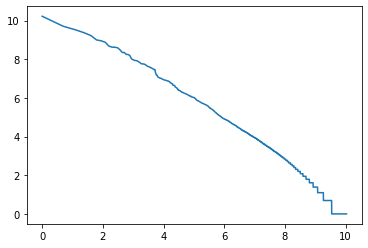

In [43]:
import math
import matplotlib.pyplot as plt

diclst = sorted(dictionary.dfs.items(), key=lambda item: item[1], reverse=True)
Xreg = [math.log(x) for x in range(1, len(diclst)+1)]
Yreg = [math.log(x[1]) for x in diclst]
plt.plot(Xreg, Yreg)
plt.show()

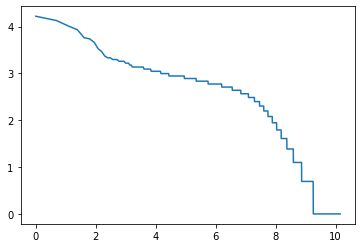

In [44]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os

MY_PATH = r'C:\Users\bscho\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)

doc_tokenized_sci = [
   simple_preprocess(line, deacc =True) for line in open('bsc_corpus0.txt', encoding='utf-8')  # 9000 studies MF
]
dict_sci = corpora.Dictionary(doc_tokenized_sci)

diclst_sci = sorted(dict_sci.dfs.items(), key=lambda item: item[1], reverse=True)
Xsci = [math.log(x) for x in range(1, len(diclst_sci)+1)]
Ysci = [math.log(x[1]) for x in diclst_sci]
plt.plot(Xsci, Ysci)
plt.show()

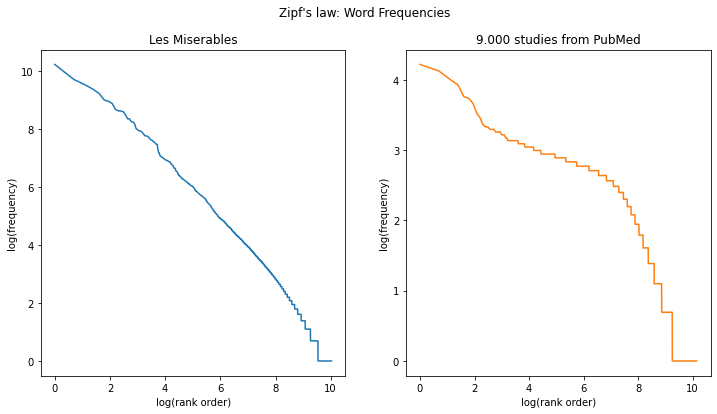

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

fig.suptitle("Zipf's law: Word Frequencies")
ax1.plot(Xreg, Yreg)
ax2.plot(Xsci, Ysci, 'tab:orange')
ax1.set_title('Les Miserables')
ax1.set(xlabel='log(rank order)', ylabel='log(frequency)')
ax2.set_title('9.000 studies from PubMed')
ax2.set(xlabel='log(rank order)', ylabel='log(frequency)')

fig.savefig('zipf_comp0.png', dpi=100, bbox_inches = 'tight', pad_inches=0.2)

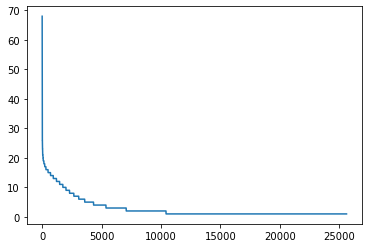

In [72]:
Xsci = [x for x in range(1, len(diclst_sci)+1)]
Ysci = [x[1] for x in diclst_sci]
plt.plot(Xsci, Ysci)
plt.show()